In [1]:
import numpy as np
import pandas as pd
import geographic_test as gt
%matplotlib inline
import autoreload
%load_ext autoreload
%autoreload 2

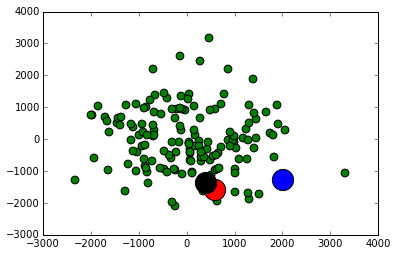

In [77]:
#Create and plot test data
test_data = gt.ForestCoverTestData(150)
gt.plot_results(test_data.points, None, test_data.fixed_points, None, True, False)
#Large circles are the fixed points:
#  blue: water, black: road, red: fire
#small green circles are the sample points

In [78]:
parser = gt.GeoParser(test_data.data, 1500)

In [79]:
parser.chain_progressive_cohorts(10)

Found 95 points for cohort - center 129 - in attempt 1
SUCCESS at fitting cohort of length 95 cost 0.000441534301588, time 40.2950688987
Accumulated 95 points
Found 68 points for cohort - center 79 - in attempt 1
SUCCESS at fitting cohort of length 68 cost 0.000420072583737, time 25.6102555336
New cohort adds 25 points
Accumulated 120 points
Found 40 points for cohort - center 132 - in attempt 1
SUCCESS at fitting cohort of length 40 cost 0.000193234903486, time 12.9702881441
New cohort adds 6 points
Accumulated 126 points
Found 77 points for cohort - center 38 - in attempt 1
SUCCESS at fitting cohort of length 77 cost 0.000379497614894, time 25.0554176696
New cohort adds 12 points
Accumulated 138 points
Found 63 points for cohort - center 58 - in attempt 1
SUCCESS at fitting cohort of length 63 cost 0.000150289168901, time 18.0398146923
New cohort adds 8 points
Accumulated 146 points
Found 87 points for cohort - center 5 - in attempt 1
Found 77 points for cohort - center 48 - in attem

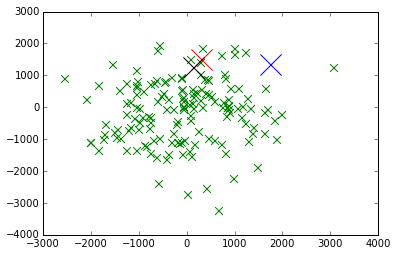

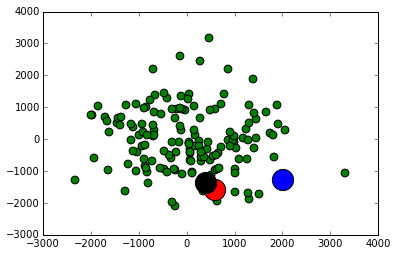

In [80]:
#Raw plots of the test data, then then hypothesized fit un-translated/rotated/reflected
gt.plot_results(test_data.points, parser.accumulated_cohorts, test_data.fixed_points, parser.df_fixed_points, False, True)
gt.plot_results(test_data.points, parser.accumulated_cohorts, test_data.fixed_points, parser.df_fixed_points, True, False)


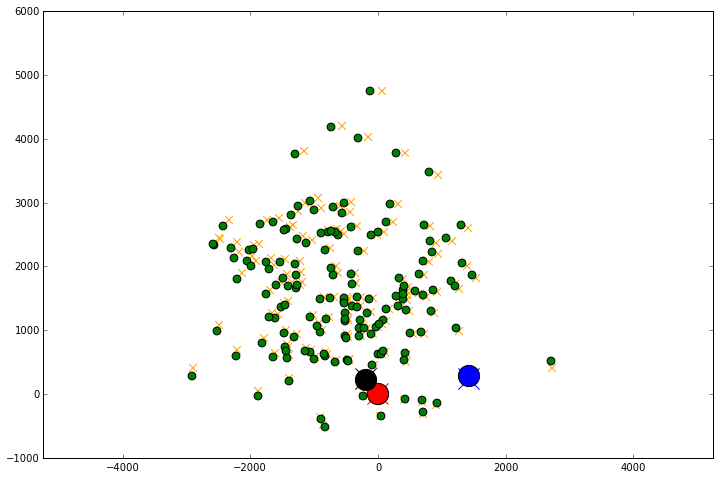

In [84]:
#Comparing the true points with the hypothesized points, including optional reflection and rotation
#  (fit by hand here though I can find the best fit algorithmically as well)
gt.compare_plots(test_data.points, parser.accumulated_cohorts, test_data.fixed_points, parser.df_fixed_points,
                 rotation=-.20*np.pi/10, reflection='x')
#Orange x's are the original test points, green circles are the fitted points
#  Fixed points plotted as large X's for test data, large circles for fitted data
#Note that I did not set the rotation as exactly as I could in order to make it easier to see both sets of points.
#  as a result of the intentional rotational error, the points farther from the center appear to be farther from true.
#  This is because the rotation makes the points move farther the farther away from the center they are.
#
#It appears the algorithm is fitting the data well enough.  (Note: one test pass had poor fits for many points,
#  that case appeared to be a problem my general algorithm has if the fixed points happen to be nearly linear in which case
#  the algorithm doesn't know which side of the line the point belongs to.  I believe that is a problem that is not addressable
#  with the given data, rather than a short coming of the particular algorithm.)

